# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | laizhou
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | glendive
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | guatire
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Se

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kavaratti,10.5669,72.6420,300.57,73,37,2.36,IN,1667857425
1,barrow,71.2906,-156.7887,269.16,86,100,4.63,US,1667857425
2,georgetown,5.4112,100.3354,299.95,89,20,1.03,MY,1667857425
3,laizhou,37.1717,119.9214,281.42,78,0,1.55,CN,1667857426
4,sao filipe,14.8961,-24.4956,299.02,67,66,1.80,CV,1667857426


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,300.57,73,37,2.36,IN,1667857425
1,barrow,71.2906,-156.7887,269.16,86,100,4.63,US,1667857425
2,georgetown,5.4112,100.3354,299.95,89,20,1.03,MY,1667857425
3,laizhou,37.1717,119.9214,281.42,78,0,1.55,CN,1667857426
4,sao filipe,14.8961,-24.4956,299.02,67,66,1.80,CV,1667857426


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

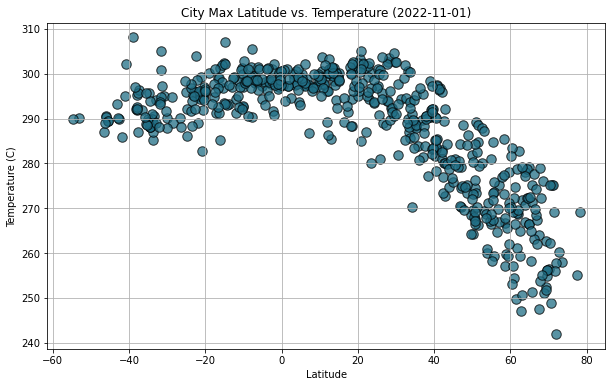

<Figure size 432x288 with 0 Axes>

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

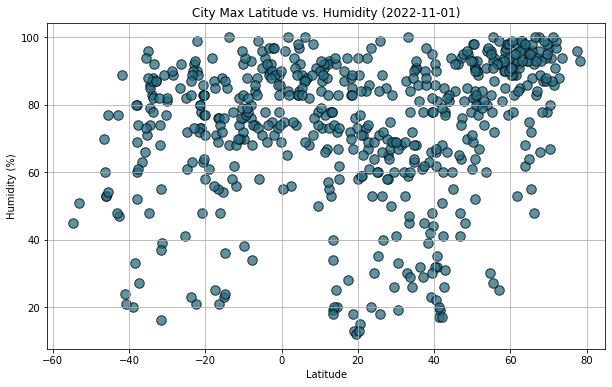

<Figure size 432x288 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

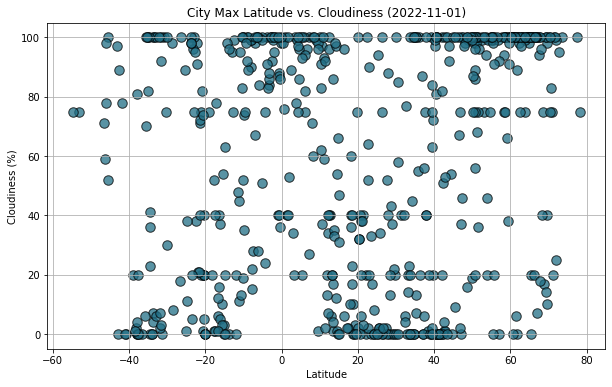

<Figure size 432x288 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

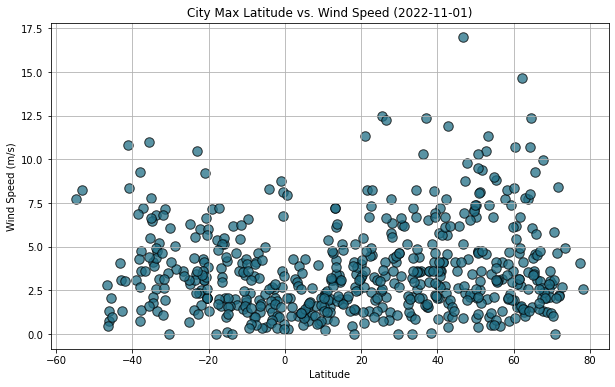

<Figure size 432x288 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
#Define a function to create Linear Regression plots
#Linear Regression plots created below

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,300.57,73,37,2.36,IN,1667857425
1,barrow,71.2906,-156.7887,269.16,86,100,4.63,US,1667857425
2,georgetown,5.4112,100.3354,299.95,89,20,1.03,MY,1667857425
3,laizhou,37.1717,119.9214,281.42,78,0,1.55,CN,1667857426
4,sao filipe,14.8961,-24.4956,299.02,67,66,1.80,CV,1667857426


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,new norfolk,-42.7826,147.0587,289.87,47,89,1.31,AU,1667857427
9,port alfred,-33.5906,26.8910,290.47,92,100,1.34,ZA,1667857428
11,punta arenas,-53.1500,-70.9167,290.21,51,75,8.23,CL,1667857141
12,mataura,-46.1927,168.8643,290.55,53,78,1.29,NZ,1667857428
13,saint-philippe,-21.3585,55.7679,294.92,80,71,4.29,RE,1667857428


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7267707666525205


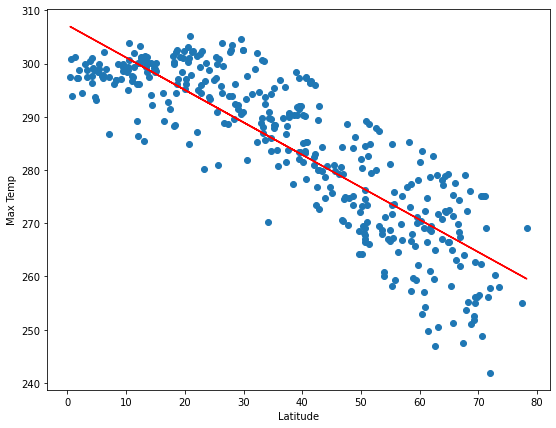

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()


R squared: 0.27332611357362024


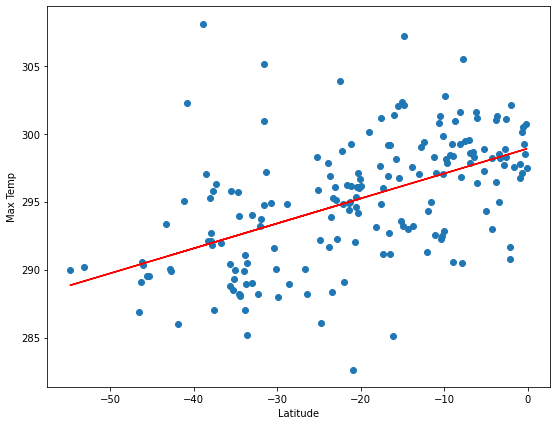

In [24]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()


**Discussion about the linear relationship:**  The northern hemisphere has a negative regression while the southern hemisphere has a positive regression both in relation to the latitude of the city and their max temp. It is understandable that the northern and southern hemispheres would have opposite regressions because the southern hemisphere has negative latitudes and the northern has positive. If the negative values were taken out of the southern hemisphere, the northern hemisphere and the southern would have almost the same regression. This makes sense sine the equator (0) has the hottest temperatures and the further you move from the equator the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.06322345180055752


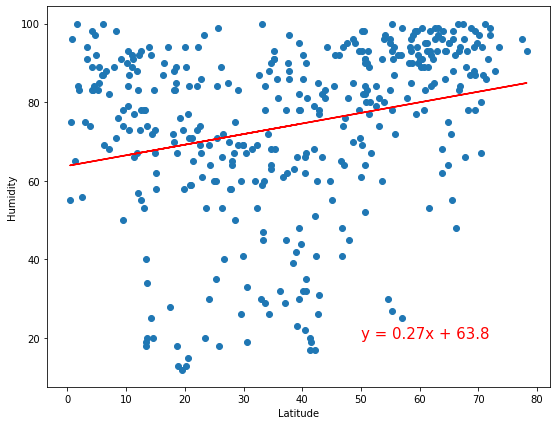

In [25]:
# Northern Hemisphere
# Linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.09359735746281056


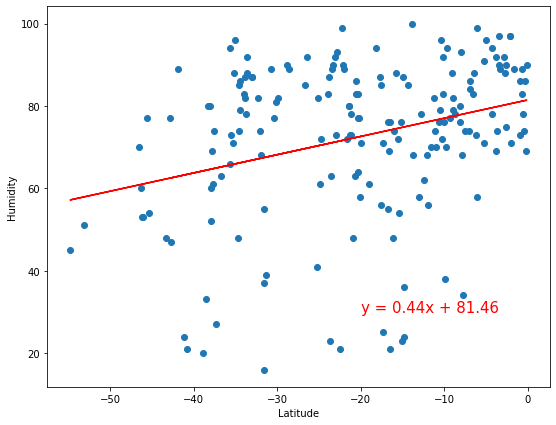

In [26]:
# Southern Hemisphere
# Linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** The northern hemisphere and southern hemispheres have different rates of humidity. This correlates with the amount of water that covers both. The northern hemisphere is covered in about 60% water and the southern is covered in about 80% water. The southern hemisphere shows almost a consistent amount of humidity despite the change of latitude. The northern hemisphere has an increase in humidity with an increase in latitude. I believe this can be explained by the deserts, like the Sahara, being close to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.08104473304394304


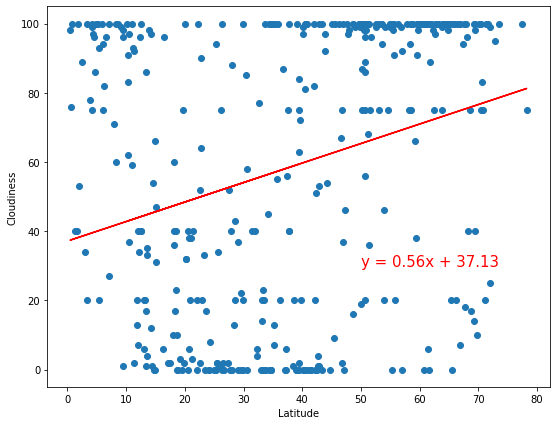

In [27]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.06157988393935131


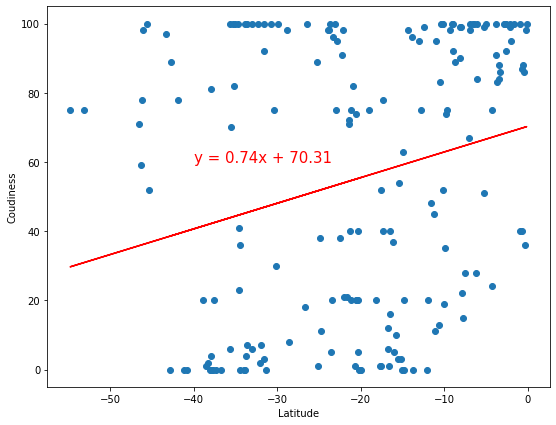

In [28]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Coudiness')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** The northern hemisphere and southern hemispheres both have positive regressions. What is interesting about these two charts is the spread of the scatter plots. The concentration of both are in 100% and 0% cloudiness with equal spread between the two. There seems be no relevance for latitude. This is back by the r value being <0.2; meaning there is very weak to no association between the line and scatter plot.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0343865957023517


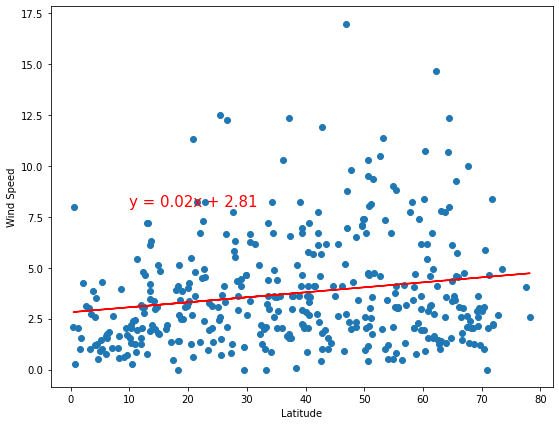

In [29]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

R squared: 0.06851615634360952


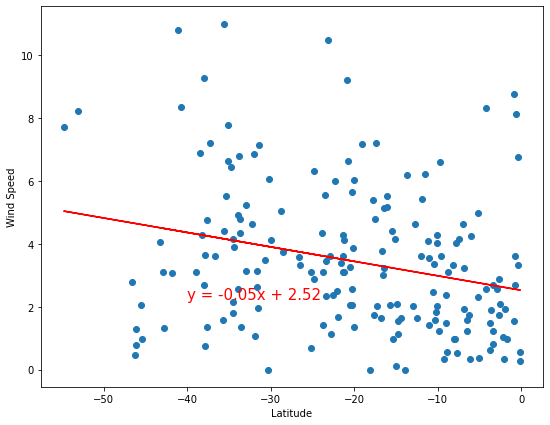

In [30]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
# Plot scatter plot
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,2.25),fontsize=15,color="red")
 
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")
 
# Show plot
plt.show()

**Discussion about the linear relationship:** The main takeaway that I perceive between the northern and southern hemisphere plots for wind speed, is that the southern hemisphere is has an higher average wind speed than what would be found in the northern hemisphere.